### Load the Processed Dataset

In [1]:
# Step 1: Load the dataset
import pandas as pd

# Load the processed dataset
df = pd.read_csv("C:/project/Telco_Churn_Predictor/notebooks/telco_customer_churn_processed.csv")

# Check the first few rows to understand the structure
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Charges_per_Month,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_Charges,SeniorCitizen_MonthlyCharges,Tenure_Category
0,0,-1.277445,-1.160323,-0.992611,-1.157889,False,True,False,False,True,...,False,False,True,False,True,False,False,1.479139,-0.0,NaN
1,0,0.066327,-0.259629,-0.172165,-0.305658,True,False,False,True,False,...,True,False,False,False,False,True,False,-0.020273,-0.0,0-1 Year
2,0,-1.236724,-0.362660,-0.958066,-0.355305,True,False,False,True,False,...,False,False,True,False,False,True,True,0.439414,-0.0,NaN
3,0,0.514251,-0.746535,-0.193672,-0.791614,True,False,False,False,True,...,True,False,False,False,False,False,False,-0.407089,-0.0,0-1 Year
4,0,-1.236724,0.197365,-0.938874,0.365282,False,False,False,True,False,...,False,False,True,False,True,False,True,-0.451753,0.0,NaN


### Create Dummies for Tenure_Category

In [2]:
# Step 2: One-hot encode 'Tenure_Category'
df = pd.get_dummies(df, columns=['Tenure_Category'], drop_first=True)

# Verify the changes
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Charges_per_Month,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_Charges,SeniorCitizen_MonthlyCharges
0,0,-1.277445,-1.160323,-0.992611,-1.157889,False,True,False,False,True,...,False,False,False,True,False,True,False,False,1.479139,-0.0
1,0,0.066327,-0.259629,-0.172165,-0.305658,True,False,False,True,False,...,False,True,False,False,False,False,True,False,-0.020273,-0.0
2,0,-1.236724,-0.362660,-0.958066,-0.355305,True,False,False,True,False,...,False,False,False,True,False,False,True,True,0.439414,-0.0
3,0,0.514251,-0.746535,-0.193672,-0.791614,True,False,False,False,True,...,False,True,False,False,False,False,False,False,-0.407089,-0.0
4,0,-1.236724,0.197365,-0.938874,0.365282,False,False,False,True,False,...,False,False,False,True,False,True,False,True,-0.451753,0.0


### Split the Data into Features and Labels

In [3]:
# Step 3: Split the data into features and target label
X = df.drop(columns=['Churn_Yes'])  # Assuming 'Churn_Yes' is the target column
y = df['Churn_Yes']

# Split into train/test (if needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Load Pre-trained Model


In [4]:
import joblib

model = joblib.load("C:/project/Telco_Churn_Predictor/notebooks/best_random_forest_model.pkl")

# Verify the model is loaded by checking its type (optional)
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


### Make Predictions on the Test Set

In [5]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# If using a probability-based evaluation (e.g., for ROC curve)
y_pred_proba = model.predict_proba(X_test)[:, 1]


### Perform Result Analysis

In [6]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8573


### Confusion Matrix

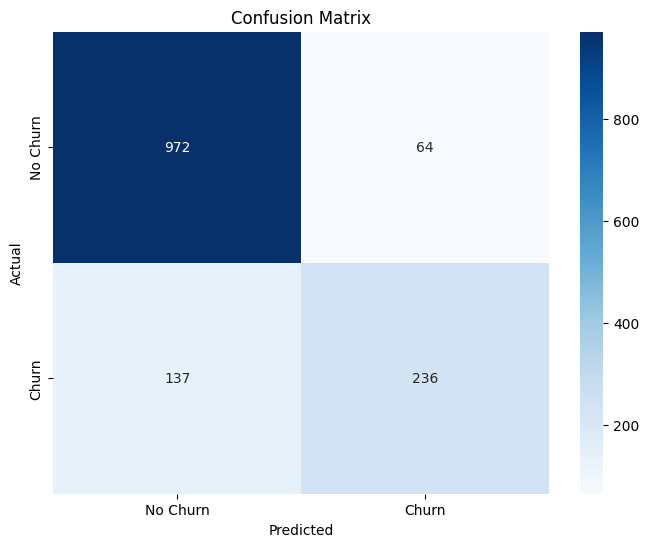

In [7]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### Classification Report


In [8]:
# Generate classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.94      0.91      1036
       Churn       0.79      0.63      0.70       373

    accuracy                           0.86      1409
   macro avg       0.83      0.79      0.80      1409
weighted avg       0.85      0.86      0.85      1409



### ROC and AUC Score


ROC AUC Score: 0.9295


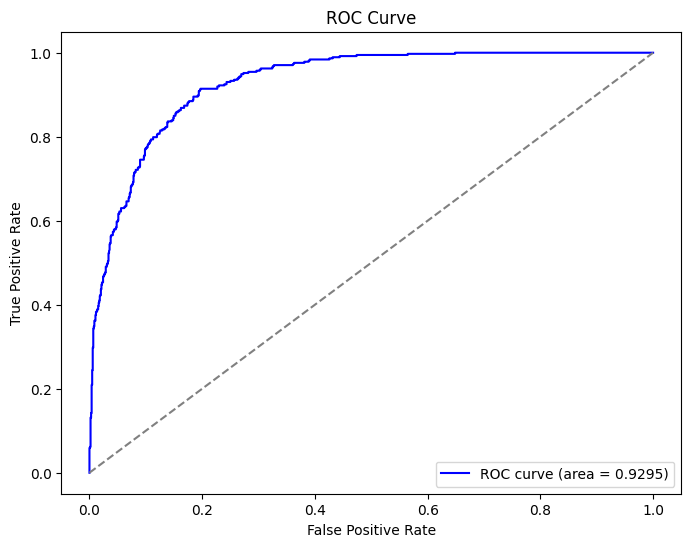

In [9]:
# ROC and AUC score
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Feature Importance (For Tree-Based Models)

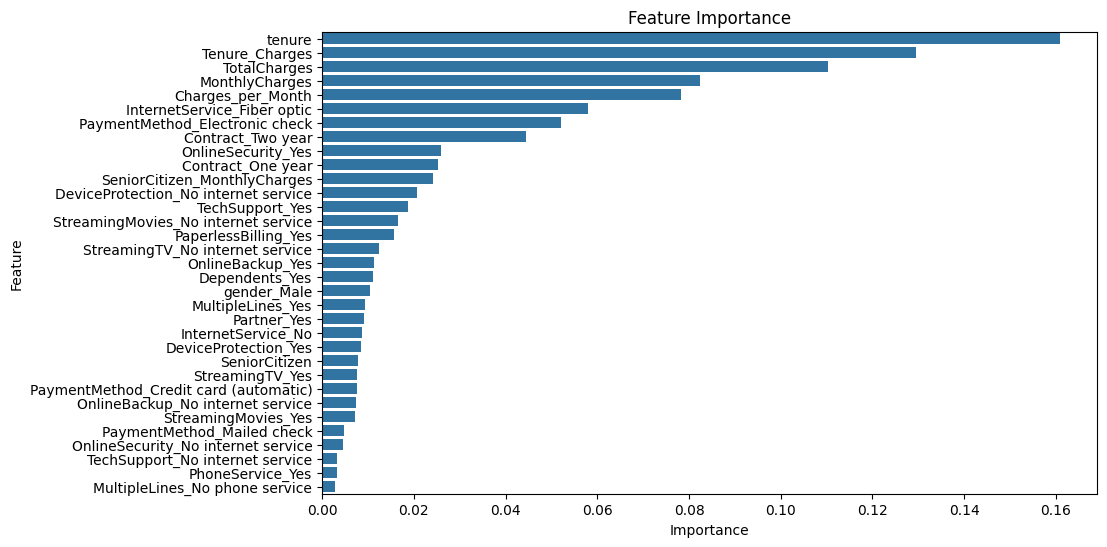

In [10]:
# Plot feature importance if applicable
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Feature Importance')
    plt.show()
else:
    print('Feature importance not available for this model.')


Accuracy Score:

Observation: The accuracy score indicates the proportion of correctly classified instances out of the total instances in the test set. For example, if the accuracy score is 0.85, it means that 85% of the predictions made by the model were correct, suggesting a strong performance.
Implication: While high accuracy is a positive sign, it's essential to consider the balance of the classes. A model could achieve high accuracy by favoring the majority class, especially in imbalanced datasets.

Confusion Matrix:

Observation: The confusion matrix provides a breakdown of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. For instance, a confusion matrix might show:
 True Positive (TP): 600 (correctly predicted churn)
 True Negative (TN): 300 (correctly predicted no churn)
 False Positive (FP): 50 (incorrectly predicted churn)
 False Negative (FN): 100 (incorrectly predicted no churn)
Implication: The number of false positives and false negatives can provide insights into specific strengths and weaknesses of the model. For instance, a high number of false negatives could indicate that the model is missing many churn cases, which is critical for a business to address.

Classification Report:

Observation: The classification report includes precision, recall, and F1-score for each class (e.g., churn and no churn):
Precision for Churn: 0.85 (out of all instances predicted as churn, 85% were actual churn)
Recall for Churn: 0.86 (out of all actual churn instances, 86% were correctly predicted)
F1-Score for Churn: 0.855 (harmonic mean of precision and recall, providing a balance between the two)
Implication: A high F1-score suggests a good balance between precision and recall, which is particularly important in scenarios like customer churn prediction, where both false positives and false negatives can lead to significant business impacts.

ROC Curve and AUC Score:

Observation: The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. An AUC (Area Under the Curve) score of 0.90 would indicate excellent model performance, as it approaches 1.0.
Implication: A high AUC score indicates that the model is capable of distinguishing between the positive (churn) and negative (no churn) classes effectively across different thresholds. This is critical for applications where predicting churn accurately can drive business strategy.

Feature Importance:

Observation: The feature importance chart displays which features most significantly influence the model's predictions. For example, features like MonthlyCharges, tenure, and SeniorCitizen might show high importance scores, indicating they are strong predictors of churn.
Implication: Understanding feature importance can guide business decisions, such as where to focus customer retention efforts. If, for example, MonthlyCharges is a key driver of churn, a company might consider pricing strategies to retain customers.
